## Conversion from DN values to backscatter coefficients

Digital number (DN) values are related to backscatter coefficients through equations that convert DN values to backscatter coefficients.

**Digital Number (DN)** are the raw pixel values in the SAR image, directly representing the amplitude of the radar signal received by the satellite's sensor.

**The backscatter coefficient**, also called normalized radar cross-section, quantifies the radar signal's strength returned to the sensor.

Understanding DN values and their conversion to backscatter coefficients is critical for leveraging ALOS-2 data effectively. DN values are suitable for initial visual interpretation, but Backscatter Coefficient is essential for quantitative analysis and comparisons. Proper calibration and pre-processing steps unlock the full potential of SAR data for real-world applications.

### Conversion from DN values to backscatter coefficients

In the previous section, the pixel value（DN; digital number）was used for visualization as is, but for rigorous data analysis, it is desirable to convert the pixel values ​​into backscattering coefficients. The conversion is done using the following formula:

$$ \gamma^{0} = 10 log_{10} <DN^2> + CF $$

Note that, <> represents averaging for noise reduction and -83.0 dB is used for CF. [Global 25m Resolution PALSAR-2/PALSAR Mosaic (Ver. 2.4.0) Dataset Instructions](https://www.eorc.jaxa.jp/ALOS/jp/dataset/pdf/DatasetDescription_PALSAR2_Mosaic_ver240_ja.pdf). A coding example is shown below.

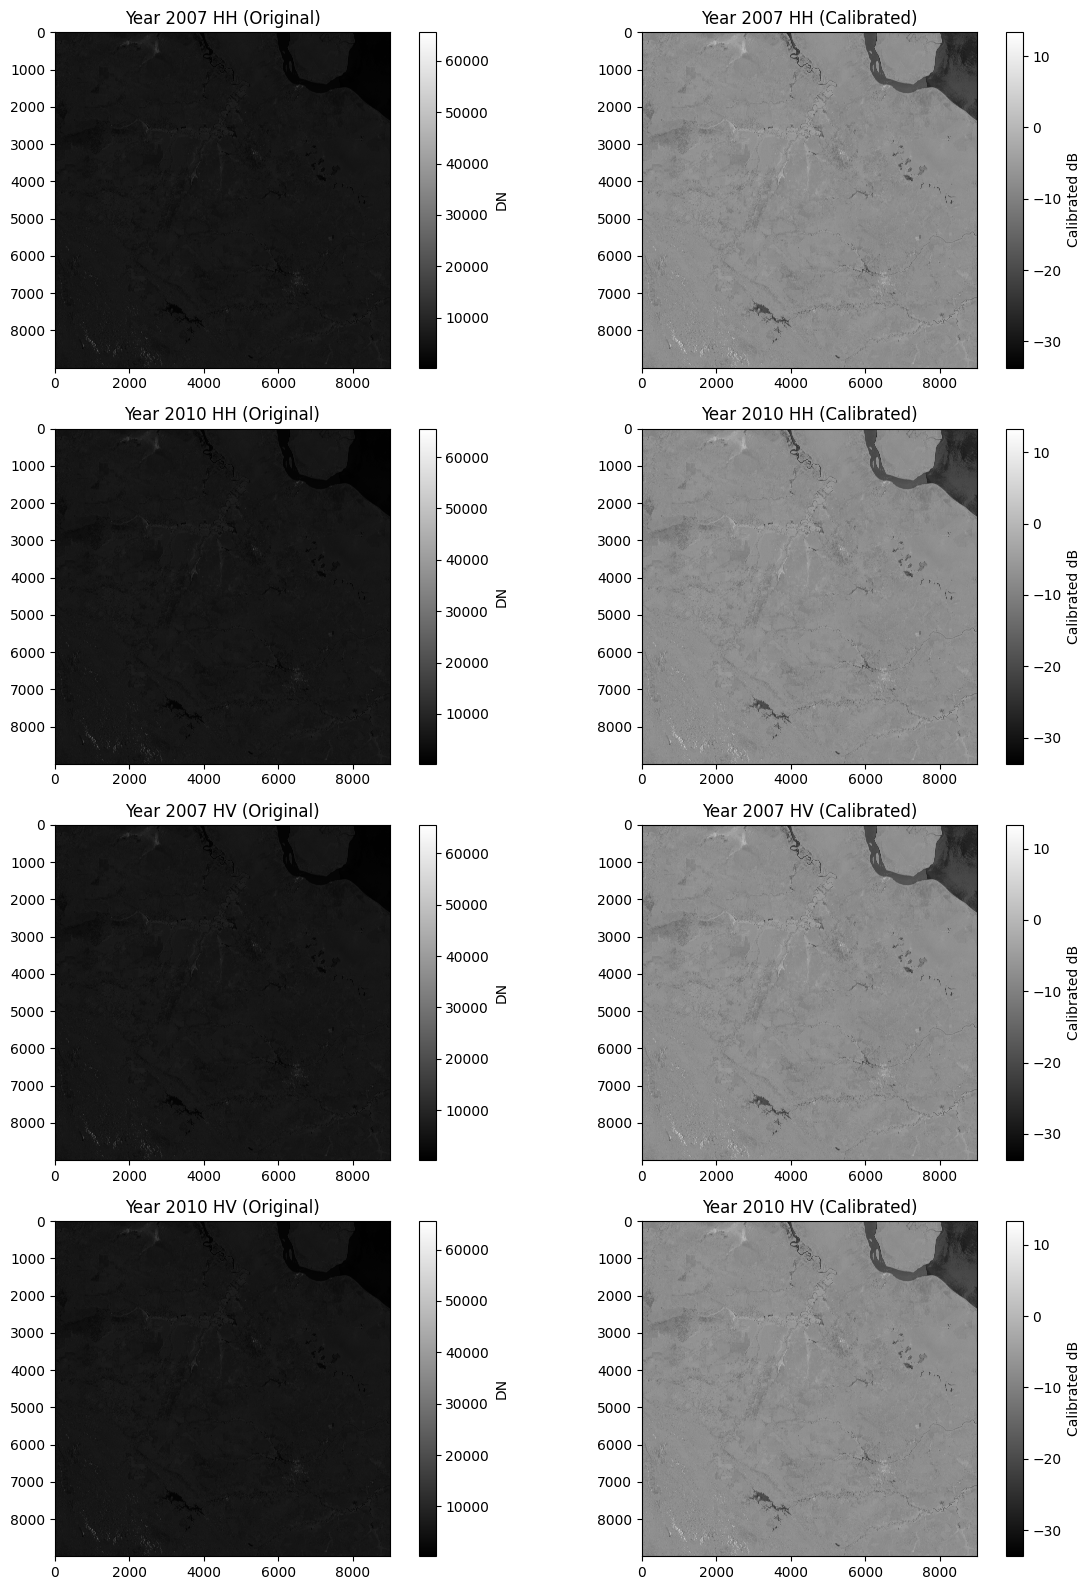

In [9]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def calibrate_ima(image):
    return 10 * np.log10(image ** 2) - 83.0

def ima_cal(file_path):
    with rasterio.open(file_path) as src:
        original = src.read(1).astype('float32')
        calibrated = calibrate_ima(original)
    return original, calibrated

hh_2007_path = "/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/Alos_2_2007_HH.tif"
hh_2010_path = "/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/Alos_2_2010_HH.tif"
hv_2007_path = "/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/Alos_2_2007_HV.tif"
hv_2010_path = "/home/jovyan/shared/PCN/ALOS-2/data/1-demo_data/Alos_2_2007_HV.tif"

hh_2007_raw, hh_2007_cal = ima_cal(hh_2007_path)
hh_2010_raw, hh_2010_cal = ima_cal(hh_2010_path)
hv_2007_raw, hv_2007_cal = ima_cal(hv_2007_path)
hv_2010_raw, hv_2010_cal = ima_cal(hv_2010_path)

fig, axs = plt.subplots(4, 2, figsize=(12, 16))

axs[0, 0].imshow(hh_2007_raw, cmap='gray')
axs[0, 0].set_title('Year 2007 HH (Original)')
axs[0, 1].imshow(hh_2007_cal, cmap='gray')
axs[0, 1].set_title('Year 2007 HH (Calibrated)')

axs[1, 0].imshow(hh_2010_raw, cmap='gray')
axs[1, 0].set_title('Year 2010 HH (Original)')
axs[1, 1].imshow(hh_2010_cal, cmap='gray')
axs[1, 1].set_title('Year 2010 HH (Calibrated)')

axs[2, 0].imshow(hv_2007_raw, cmap='gray')
axs[2, 0].set_title('Year 2007 HV (Original)')
axs[2, 1].imshow(hv_2007_cal, cmap='gray')
axs[2, 1].set_title('Year 2007 HV (Calibrated)')

axs[3, 0].imshow(hv_2010_raw, cmap='gray')
axs[3, 0].set_title('Year 2010 HV (Original)')
axs[3, 1].imshow(hv_2010_cal, cmap='gray')
axs[3, 1].set_title('Year 2010 HV (Calibrated)')

for i in range(4):
    fig.colorbar(axs[i, 0].imshow(hh_2007_raw, cmap='gray'), ax=axs[i, 0], orientation='vertical', label='DN')
    fig.colorbar(axs[i, 1].imshow(hh_2007_cal, cmap='gray'), ax=axs[i, 1], orientation='vertical', label='Calibrated dB')

plt.tight_layout()
plt.show()